# Amazon Fine Food Reviews - EDA


**Data Source:** https://www.kaggle.com/snap/amazon-fine-food-reviews <br>


> The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

**Number of reviews: 568,454**<br> 
**Number of users: 256,059**<br> 
**Number of products: 74,258**<br> 
**Timespan: Oct 1999 - Oct 2012**<br> 
**Number of Attributes/Columns in data: 10**

### Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review


### Objective:
> Given a review, determine whether the review is positive (Rating of 4 or 5) or negative (rating of 1 or 2).

<br>
[Q] How to determine if a review is positive or negative?<br>
<br> 
[Ans] We could use the Score/Rating. A rating of 4 or 5 could be cosnidered a positive review. A review of 1 or 2 could be considered negative. A review of 3 is nuetral and ignored. This is an approximate and proxy way of determining the polarity (positivity/negativity) of a review.


In [1]:
#importing required libraries

%matplotlib notebook
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
print("Libraries Imported!")

#importind data as pandas dataframe
amazon_data = pd.read_csv("Amazonfinefoods/Reviews.csv")
print("Data loaded successfully!")

Libraries Imported!
Data loaded successfully!


In [2]:
#getting the number of data points and number of columns of the data

print("number of rows in data=",amazon_data.shape[0])
print("number of columns in data=",amazon_data.shape[1])
print("\n")
amazon_data.head(5)

number of rows in data= 568454
number of columns in data= 10




,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
#changing the timestamp column into standard time
amazon_data["Time"] = pd.to_datetime(amazon_data["Time"] , unit ="s")

In [4]:
#getting the information about columns
print(amazon_data.columns)
print(amazon_data.info())

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Id                      568454 non-null  int64         
 1   ProductId               568454 non-null  object        
 2   UserId                  568454 non-null  object        
 3   ProfileName             568438 non-null  object        
 4   HelpfulnessNumerator    568454 non-null  int64         
 5   HelpfulnessDenominator  568454 non-null  int64         
 6   Score                   568454 non-null  int64         
 7   Time                    568454 non-null  datetime64[ns]
 8   Summary                 568427 non-null  object        
 9   Text                    568454 non-null  objec

## Droping the Reviews with Rating Score 3 and Assigning labels to the reviews

In [5]:
#removing the reviews with rating score equals to 3 

amazon_data_filtered = amazon_data[amazon_data["Score"] != 3]


#assigning labels, reviews with rating greater than 3 will be assginged as "Postive" , otherwise it will be "Negative"

def remove_3_score(r):
    if r > 3:
        return "Positive"
    else:
        return "Negative"

review_score = amazon_data_filtered["Score"]    
review_polarity = review_score.map(remove_3_score)

#replacing the score column with review polarity column

amazon_data_filtered["Score"] = review_polarity

## Removing Duplicate Entries and reviews realted to books in Data

In [6]:
#sorting data by productId in ascending order
amazon_data_sorted = amazon_data_filtered.sort_values('ProductId', axis=0, ascending=True, inplace=False,
                                                      kind='quicksort', na_position='last')

#droping the duplicates entries and retaining the first entry of duplicated data point
amazon_data_deduplicate=amazon_data_sorted.drop_duplicates(subset={"UserId","ProfileName","Time","Text"},
                                                              keep='first', inplace=False)

#filtering the data with helpfulness numerator less than helpfulness denominator as it not a possible case
amazon_data_deduplicate1 = amazon_data_deduplicate[amazon_data_deduplicate.HelpfulnessNumerator <= 
                                                 amazon_data_deduplicate.HelpfulnessDenominator]

amazon_data_deduplicate1.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
150523,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,Positive,1999-10-08,EVERY book is educational,this witty little book makes my son laugh at l...
150505,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,Positive,2007-11-11,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc..."
150506,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,Positive,2007-10-04,chicken soup with rice months,This is a fun way for children to learn their ...
150507,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,Positive,2004-02-06,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...
150508,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,Positive,2002-04-10,A great way to learn the months,This is a book of poetry about the months of t...
150510,150511,0006641040,A1C9K534BCI9GO,Laura Purdie Salas,0,0,Positive,2012-08-06,Charming and childlike,"A charming, rhyming book that describes the ci..."
150511,150512,0006641040,A1DJXZA5V5FFVA,A. Conway,0,0,Positive,2012-05-29,Must have.,I set aside at least an hour each day to read ...
150512,150513,0006641040,ASH0DZQQF6AIZ,tessarat,0,0,Positive,2012-01-05,A classic,I remembered this book from my childhood and g...
150513,150514,0006641040,A2ONB6ZA292PA,Rosalind Matzner,0,0,Positive,2011-08-21,Chicken soup with Rice,It's a great book with adorable illustrations....
150514,150515,0006641040,A2RTT81R6Y3R7X,Lindylu,0,0,Positive,2011-04-19,One of our family's favorite books,This book is a family favorite and was read to...


> **There are some reviews which belongs to books category but they are here in the foods data.
We need to drop all the books reviews.**

In [7]:
#droping the reviews related to books
amazon_data_final= amazon_data_deduplicate1.iloc[38:,]

In [8]:
#getting the final shape of the data
print(amazon_data_final.shape)

(364133, 10)


In [9]:
#getting the ampunt o data retained after droping reviews with rating 3 and droping duplicates
print(len(amazon_data_final)/len(amazon_data)*100)

64.05672226776485


Positive    307026
Negative     57107
Name: Score, dtype: int64


<IPython.core.display.Javascript object>


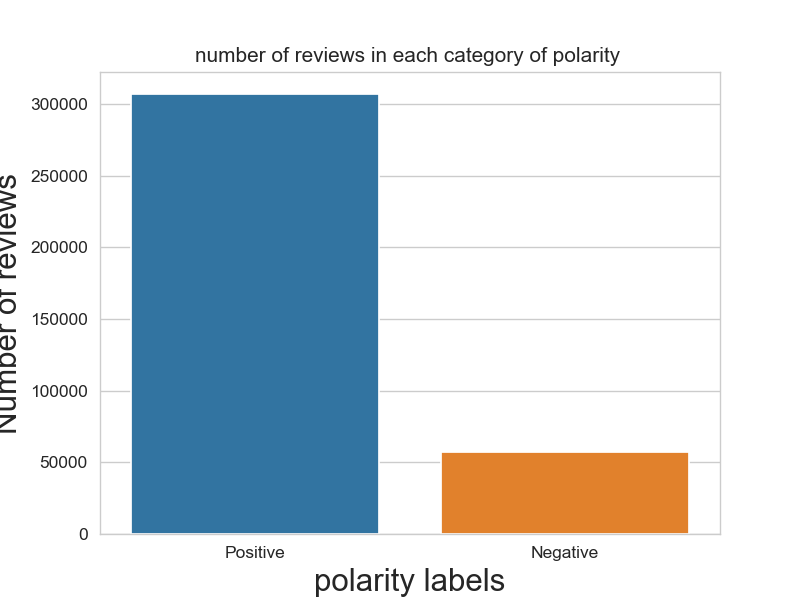

Text(0.5, 0, 'polarity labels')

In [10]:
#getting the number of revies presernt in each category

polarity_count = amazon_data_final["Score"].value_counts()
print(polarity_count)

#ploting the number of reviews in each category
sns.set_style('whitegrid')
sns.barplot(polarity_count.index , polarity_count.values)
plt.title("number of reviews in each category of polarity ")
plt.ylabel('Number of reviews', fontsize=18)
plt.xlabel('polarity labels', fontsize=18)

#### Observation:
1) Clearly we san see that dataset is imbalanced , with positive class in majority

# Text Pre-Processing

Now that we have finished deduplication our data requires some preprocessing before we go on further with analysis and making the prediction model.

Hence in the Preprocessing phase we do the following in the order below:-

1. Begin by removing the html tags
2. Remove any punctuations or limited set of special characters like , or . or # etc.
3. Check if the word is made up of english letters and is not alpha-numeric
4. Check to see if the length of the word is greater than 2 (as it was researched that there is no adjective in 2-letters)
5. Convert the word to lowercase
6. Remove Stopwords
7. Finally Snowball Stemming the word (it was obsereved to be better than Porter Stemming)<br>



In [11]:
#importing required libraries
import re

#pre-defined functions to remove html tags ,punctuations, special characters

#function for removing punctuations and special characters
def remove_punc(sentence):
    cleanpunc = re.sub(r'[?|!|\'|"|#]',r'',str(sentence))
    #specific
    cleanpunc = re.sub(r"won't", "will not", cleanpunc)
    cleanpunc = re.sub(r"can\'t", "can not", cleanpunc)
    
    # general
    cleanpunc = re.sub(r"n\'t", " not", cleanpunc)
    cleanpunc = re.sub(r"\'re", " are", cleanpunc)
    cleanpunc = re.sub(r"\'s", " is", cleanpunc)
    cleanpunc = re.sub(r"\'d", " would", cleanpunc)
    cleanpunc = re.sub(r"\'ll", " will", cleanpunc)
    cleanpunc = re.sub(r"\'t", " not", cleanpunc)
    cleanpunc = re.sub(r"\'ve", " have", cleanpunc)
    cleanpunc = re.sub(r"\'m", " am", cleanpunc)
    ###############################################
    cleanpunc = re.sub(r'[.|,|)|(|\|/]',r' ',cleanpunc)
    cleanpunc = cleanpunc.strip()
    cleanpunc = cleanpunc.replace("\n" ,'')
    return cleanpunc


#function for removing html tags

def remove_html (sentence):
    cleanhtml = re.compile('<.*?>')
    clean_text = re.sub(cleanhtml,' ',str(sentence))
    clean_text = re.sub(r"http\S+", "", clean_text)
    clean_text = BeautifulSoup(clean_text, 'lxml').get_text()
    clean_text = remove_punc(clean_text)
    clean_text = re.sub("\S*\d\S*", "", clean_text).strip()
    
    return clean_text
    
    
#function for keeping only alphabets

def keep_alpha(sentence):
    alpha_sentence = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sentence += alpha_word
        alpha_sentence += " "
    alpha_sentence = alpha_sentence.strip()
    return alpha_sentence

In [12]:
#removing stopwords with some exceptions and do stemmming
#initializing stopwords with some exceptions words like not and very and stemming 
import nltk
#nltk.download("stopwords")

from nltk.corpus import stopwords

exceptions = set(("very","not","few","against","more" ,"between",))

stop_words = set(stopwords.words('english')) - exceptions
stop_words.update(['zero','one','two','three','four','five','six','seven','eight',
                   'nine','ten','may','also','however','yet'])
print(stop_words)

#function for removing stopwords

def remove_stopwords(sentence):
    no_stopword_review = ""
    for word in sentence.split():
        if word not in stop_words:
            no_stopword_review += word
            no_stopword_review += " "
    no_stopword_review = no_stopword_review.strip()
    return no_stopword_review


#stemming
sno = nltk.stem.SnowballStemmer('english')

#function to do stemming
def stem_remove(sentence):
    stem_sentence = ""
    for word in sentence.split():
        stem_word = sno.stem(word)
        stem_sentence += stem_word
        stem_sentence += " "
    stem_sentence = stem_sentence.strip()
    return stem_sentence

{"wouldn't", 'five', 'at', 'herself', "needn't", 'shouldn', 'should', 'was', 've', 'each', "isn't", 'with', 'own', 'here', "you'll", 'an', 'during', 'is', 'did', 'why', 'too', 'off', "hasn't", 'while', 'they', 'so', 'couldn', 'aren', 'after', 'y', 're', 'do', "haven't", "you'd", 'a', 'both', 'wasn', 'all', 'only', 'one', 'ourselves', 'will', 'weren', 'how', "should've", 'themselves', 'above', 'this', 'don', 'its', "mightn't", "it's", 'most', 'nor', 'because', 'our', "that'll", "doesn't", 'ten', 'below', 'or', "don't", 'from', 'out', 'these', 'himself', 'for', 'ma', 'six', 'hadn', "aren't", 'may', 'doesn', 'two', "shan't", 'through', 'be', 'further', 'any', 'then', 'on', 'seven', 'have', 'when', 'before', 'didn', "you're", 'but', "won't", 'shan', "she's", 'nine', 'you', 'to', 'about', 'whom', 'and', 'same', 'of', 'ours', 'them', 'over', 'other', 'some', 'mightn', 'does', 'won', 'their', "didn't", 'under', 'having', 'were', 'my', 'that', 'into', 'can', 'i', 'his', 'those', 'in', 'there',

In [13]:
def concatenateSummaryWithText(str1, str2):
    return str1 + ' ' + str2

In [15]:
amazon_data_final.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
171160,171161,7310172001,AFXMWPNS1BLU4,H. Sandler,0,0,Positive,2008-12-16,Excellent treats,I have been feeding my greyhounds these treats...
171159,171160,7310172001,A74C7IARQEM1R,stucker,0,0,Positive,2008-12-24,Sophie's Treats,This is one product that my welsh terrier can ...


In [16]:
#applying all pre-processing functions on the text to get cleaned text
amazon_data_final['Text'] = amazon_data_final["Text"].str.lower()
amazon_data_final['Text'] = amazon_data_final['Text'].apply(remove_punc)
amazon_data_final["Text"] = amazon_data_final["Text"].apply(remove_html)
amazon_data_final["Text"] = amazon_data_final["Text"].apply(keep_alpha)
amazon_data_final["Text"] = amazon_data_final["Text"].apply(remove_stopwords)
amazon_data_final["Text"] = amazon_data_final["Text"].apply(stem_remove)

#applying all pre-processing functions on the Summary text to get cleaned text
amazon_data_final['Summary'] = amazon_data_final["Summary"].str.lower()
amazon_data_final['Summary'] = amazon_data_final['Summary'].apply(remove_punc)
amazon_data_final["Summary"] = amazon_data_final["Summary"].apply(remove_html)
amazon_data_final["Summary"] = amazon_data_final["Summary"].apply(keep_alpha)
amazon_data_final["Summary"] = amazon_data_final["Summary"].apply(remove_stopwords)
amazon_data_final["Summary"] = amazon_data_final["Summary"].apply(stem_remove)

In [ ]:
#preprocessed_reviews = list(map(concatenateSummaryWithText, amazon_data_final['Text'] , amazon_data_final["Summary"]))

In [17]:
amazon_data_final["Reviews_with_summary"] = amazon_data_final["Text"] + amazon_data_final["Summary"]

In [35]:
amazon_data_final.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Reviews_with_summary
0,171161,7310172001,AFXMWPNS1BLU4,H. Sandler,0,0,Positive,2008-12-16,feed greyhound treat year hound littl finicki ...
1,171160,7310172001,A74C7IARQEM1R,stucker,0,0,Positive,2008-12-24,product welsh terrier eat sophi food alergi ve...
2,171144,7310172001,A1V5MY8V9AWUQB,"Cheryl Sapper ""champagne girl""",0,0,Positive,2009-06-12,dog treat lhasa apso eat make happ becuas ad i...


In [19]:
amazon_data_final = amazon_data_final.drop(["Text", "Summary"], axis=1)

In [21]:
#reseting the index

amazon_data_final.reset_index(drop= True ,inplace =True)

In [37]:
#saving the data after pre-processing
amazon_data_final.to_csv("final_reviews.csv", index =False)